# Make bar plots of ROH tracts
Make admixture style plots of ROH, both expected as well as for empirical Individuals

In [4]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as clb
import matplotlib.colors as cls
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("Harald-Laptop"):
    print("Harald laptop detected.")
    path = "/home/hringbauer/git/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

#sys.path.append("./package") # Append Hapsburg Folder
sys.path.insert(0,"./package/")  # hack to get local package first in path
from hapsburg.PackagesSupport.roh_expectations import Expected_Roh
from hapsburg.figures.plot_bars import plot_panel_row, plot_legend_only, \
                                prepare_dfs_plot, prep_dfs_plot_exact, \
                                prep_xlabels # See the cunctions at the bottom ("legacy")

compute-a-17-101.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer
CPU Count: 32


### Single Example for theoretical Expectations [For Supplement]

Saved figure to ./figures/manuscript/barplots/bar_legend.pdf


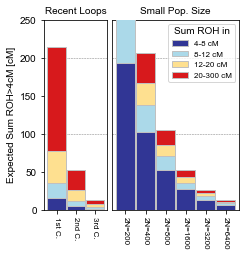

In [3]:
plot_legend_only(savepath="./figures/manuscript/barplots/bar_legend.pdf", 
                 figsize=(3.5,3.5), ylim=[0, 250],
                 c=["#313695", "#abd9e9", "#fee090", "#d7191c"],
                 degrees=[1, 2, 3], hlines=[100, 200, 300, 400], fs_l=8,
                 Ns=[200, 400, 800, 1600, 3200, 6400])

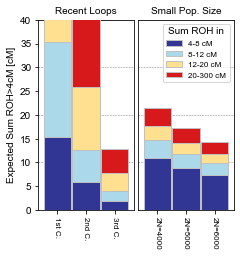

In [11]:
plot_legend_only(savepath="", 
                 figsize=(3.5,3.5), ylim=[0, 40],
                 c=["#313695", "#abd9e9", "#fee090", "#d7191c"],
                 degrees=[1,2,3], hlines=[10, 20, 30, 40], fs_l=8,
                 Ns=[4000, 5000, 6000])

### Legend for main Figure

Saved figure to ./figures/manuscript/barplots/bar_expectations.pdf


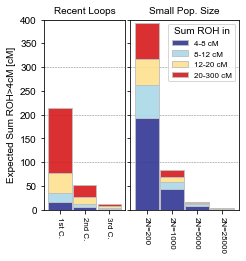

In [7]:
plot_legend_only(savepath="./figures/manuscript/barplots/bar_expectations.pdf", 
                 figsize=(3.5,3.5), ylim=[0, 400],
                 c=["#313695", "#abd9e9", "#fee090", "#d7191c"],
                 degrees=[1, 2, 3], hlines=[100, 200, 300, 400], fs_l=8,
                 Ns=[200, 1000, 5000, 25000])

## Do the Plot for empirical data

### Make a plot of ALL ancient samples

In [15]:
def plot_panel(df1, plot=True, savepath="",  leg_pos=-1, 
               col_sort="sum_roh>4", col_xlabels="iid"):
    """Plot grouped panel"""

    ### Split per pop
    pops = set(df1["pop"])
    df_list = []
    for p in pops:
        df_list.append(df1[df1["pop"]==p].reset_index())

    medians = [np.median(df[col_sort]) for df in df_list]
    idx = np.argsort(medians)
    idx=idx[::-1] # Reverse sort
    df_plots = [df_list[i] for i in idx]
    df_plots = [df.sort_values(by="sum_roh>4", ascending=False) for df in df_plots]
    lgths = [len(df) for df in df_plots]
    
    if len(col_xlabels)>0:
        xlabels = [df[col_xlabels].values for df in df_plots]
        xlabels = [[str(int(v)) + " BP" for v in vec] for vec in xlabels] # Make BP labels
    else:
        xlabels = False

    if plot:
        plot_panel_row(df_plots, figsize=(np.sum(lgths)/8, 3.5), ylim=[0,350],
                       ha_title="center", r_title=90, title_col="pop", 
                       hlines=[100, 200, 300], wspace=0.2,
                       x_labels=xlabels, leg_pos=leg_pos, degrees=[], Ns=[], 
                       fs_l=8, fs_y=8, fs_x=6, fs_t=8,
                       cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
                       savepath=savepath)

# Plot bar plots per region [Supplemental Figures]

In [4]:
### Plot ALL individuals
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.1.csv", sep='\t')
df1 = df1[df1["age"]>0]
#plot_panel(df1, plot=True, savepath="./figures_test/bar_plots_ALL.pdf")
df2 = df1[df1["age"]>10000]
np.median(df2["sum_roh>4"] - df2["sum_roh>8"])

54.600319000000006

In [ ]:
df1["region"].value_counts()

In [43]:
len(df2)

43

In [ ]:
df1["region"].value_counts()

In [18]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.1.csv", sep='\t')
df1 = df1[df1["age"]>0]
regs = set(df1["region"])
#regs.remove("all")
#regs.remove("South Africa")

In [ ]:
for r in regs:
    df_t = df1[df1["region"]==r].reset_index()
    savepath = os.path.join("./figures/ancient_barplots/v2/", r +".pdf")
    plot_panel(df_t, plot=True, leg_pos=0, savepath=savepath,
               col_sort='age', col_xlabels='age')

In [21]:
### Zip them 
dir_tozip = "./figures/ancient_barplots/v2/"
dir_zip = "./figures/ancient_barplots/regions_barplots_v2.zip"
!zip -r -j $dir_zip $dir_tozip

  adding: Vanuatu.pdf (deflated 27%)
  adding: Britain.pdf (deflated 19%)
  adding: Andean.pdf (deflated 25%)
  adding: Himalaya.pdf (deflated 31%)
  adding: East Steppe.pdf (deflated 24%)
  adding: Bering Sea.pdf (deflated 28%)
  adding: Central Italy.pdf (deflated 23%)
  adding: Sardinia.pdf (deflated 26%)
  adding: Central Asia.pdf (deflated 17%)
  adding: Black Sea.pdf (deflated 27%)
  adding: East Africa.pdf (deflated 27%)
  adding: all.pdf (deflated 26%)
  adding: Atlantic Coast.pdf (deflated 27%)
  adding: South Africa.pdf (deflated 29%)
  adding: Pacific NW.pdf (deflated 29%)
  adding: North Africa.pdf (deflated 30%)
  adding: Steppe.pdf (deflated 12%)
  adding: Baltic Sea.pdf (deflated 21%)
  adding: Levante.pdf (deflated 25%)
  adding: Patagonia.pdf (deflated 28%)
  adding: Islands.pdf (deflated 26%)
  adding: Aegan.pdf (deflated 24%)
  adding: Central Europe.pdf (deflated 19%)
  adding: Eastern Europe.pdf (deflated 19%)
  adding: Iberia.pdf (deflated 19%)
  adding: Balkans.p

### Levant

Saved figure to ./figures/levante.pdf


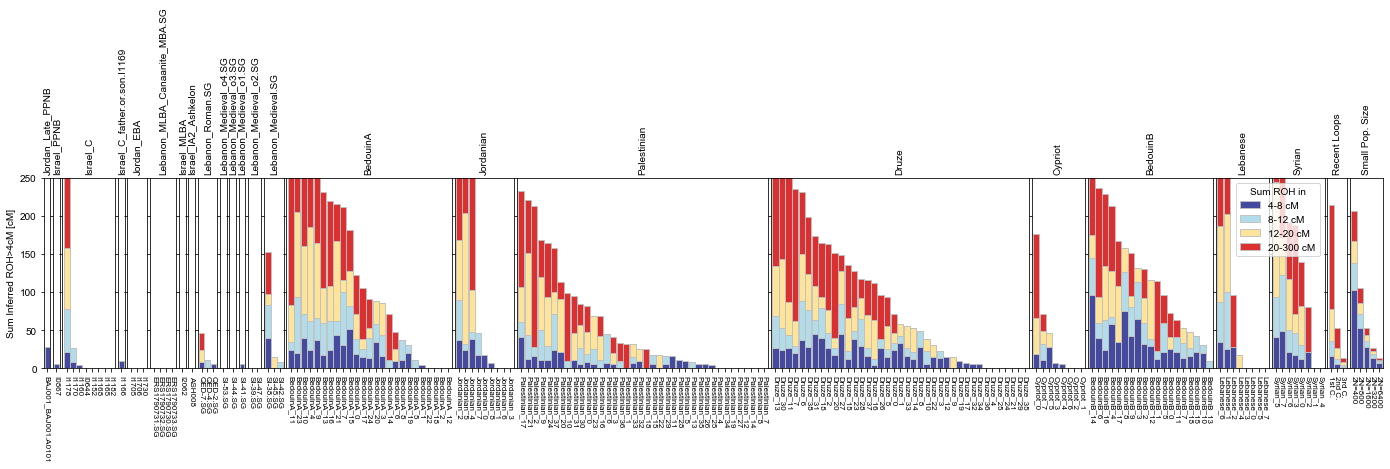

In [37]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["region"]=="Levante"]
df1["clst"]=df1["pop"]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="./figures/levante.pdf", leg_pos=-1)

# Human Origins Dataset

### Plot and save every Population

In [ ]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.1.csv", sep='\t')
df1 = df1[df1["age"]==0]  # Extract the modern samples
df1["pop"].value_counts()
pops = set(df1["pop"])

for pop in pops:
    df_t = df1[df1["pop"]==pop].copy()    # Sindhi/Saudi/Makrani/Nganasan/Mozabite
    print(f"Doing Population {pop}: {len(df_t)} Individuals")
    savepath = "./figures/ho_pops_barplots/" + str(pop) + ".pdf" 
    plot_dfs1, cols = prepare_dfs_plot(df_t, cms=[4,8,12,20])
    plot_panel_row(plot_dfs1, figsize=((len(df_t)+6)/6, 3.5), ylim=[0,350],
                   savepath=savepath, 
                   leg_pos=0, cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
                   r_title=90, show=False)
    plt.close()

In [ ]:
### Zip them 
dir_tozip = "./figures/ho_pops_barplots/"
dir_zip = "./figures/ho_pops_barplots/ho_all_barplots.zip"
!zip -r -j $dir_zip $dir_tozip

# Bar plot panel [Figure 3 main]

### Do key modern Populations (French, Han, Palestinian, Pathan)

Saved figure to ./figures/manuscript/barplots/v2/big_pop.pdf


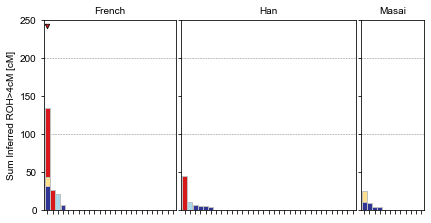

In [74]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
mod_clsts = ["French", "Han", "Masai"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=mod_clsts, mod_only=True)
x_labels = prep_xlabels(df_plots)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250],
               ha_title="center", r_title=0, title_col="pop", hlines=[100, 200],
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               x_labels=False, leg_pos=0, degrees=[], Ns=[], 
               savepath="./figures/manuscript/barplots/v2/big_pop.pdf")

Saved figure to ./figures/manuscript/barplots/v2/cousin_pop.pdf


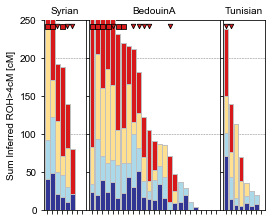

In [75]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
mod_clsts = ["Syrian", "BedouinA", "Tunisian"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=mod_clsts, mod_only=True)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250],
               ha_title="center", r_title=0, title_col="pop", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[], 
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               savepath="./figures/manuscript/barplots/v2/cousin_pop.pdf")

Saved figure to ./figures/manuscript/barplots/v2/small_pops.pdf


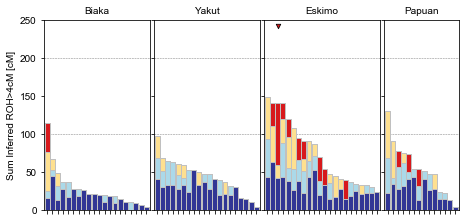

In [76]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1.sort_values(by="sum_roh>4", ascending=False)
mod_clsts = ["Biaka", "Yakut", "Eskimo", "Papuan"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=mod_clsts, mod_only=True)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250],
               ha_title="center", r_title=0, title_col="pop", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[], 
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               savepath="./figures/manuscript/barplots/v2/small_pops.pdf")

# Paper: Plot Key Ancient Populations
Imperial Rome, Mesolithic Steppe, Anatolia N, Iberia Mesolithic, EN, N

## Plot Hunter Gatherer Populations [Figure 3]

Saved figure to ./figures/manuscript/barplots/v2/hg_pops.pdf


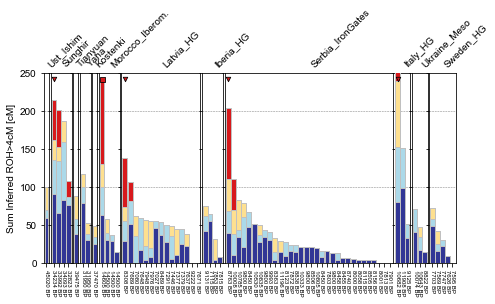

In [95]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_t = df1[df1["age"]>7000]
#df_t = df1[df1["economy"].values == "Hunter Gatherer"]
#df1[df1["age"]>10000].sort_values(by="age")

clsts = ["Ust_Ishim", "Sunghir", "China_Tianyuan", "Yana", "Kostenki", "Morocco_Iberomaurusian",
         "Latvia_HG", "Iberia_HG", "Serbia_Mesolithic_IronGates", "Italy_Mesolithic", "Ukraine_Mesolithic", 
         "Sweden_HG"]

labels = ["Ust_Ishim", "Sunghir", "Tianyuan", "Yana", "Kostenki", "Morocco_Iberom.",
          "Latvia_HG", "Iberia_HG", 
          "Serbia_IronGates", "Italy_HG", "Ukraine_Meso", "Sweden_HG"]

df_plots, lgths = prep_dfs_plot_exact(df_t, pops=clsts, mod_only=False, exact=False)
#print([len(df) for df in df_plots])
x_labels = prep_xlabels(df_plots)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               titles=labels, ha_title="left", r_title=45, title_col="pop", hlines=[100, 200], 
               x_labels=x_labels, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               savepath="./figures/manuscript/barplots/v2/hg_pops.pdf")

In [ ]:
# Hunter Gatherers [not main plot, exploratory]
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
regions = ["Central Europe", "Balkans", "Iberia", "Black Sea", 
           "Baltic Sea", "Steppe", "Aegan"]

df_plot = df1[(df1["region"].isin(regions)) & (df1["economy"]=="Hunter Gatherer")].copy() # Also select only moderns!
plot_dfs, cols = prepare_dfs_plot(df_plot, col_group="region", mod_group="pop")
plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               ha_title="left", r_title=45, title_col="region", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               savepath="")

# Plot Farmer Populations

In [96]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_t= df1[df1["economy"]=="Agricultural"]
#df_t[df_t["clst"].str.contains("Sar")]["clst"].value_counts()
#df_t["pop"].value_counts()
#df_t[df_t["clst"].str.contains("Rom")]

In [88]:
### Side quest: Stats for Israel
f_ana = df_t[df_t["pop"].str.contains("Israel_C")]
idx= df_ana["sum_roh>4"]==0
print(f"{np.sum(idx)} / {len(idx)} Individuals have no ROH")
df_ana.sort_values(by="age")
#np.sum(idx)
#len(idx)

5 / 9 Individuals have no ROH


Saved figure to ./figures/manuscript/barplots/v2/farmer_pops.pdf


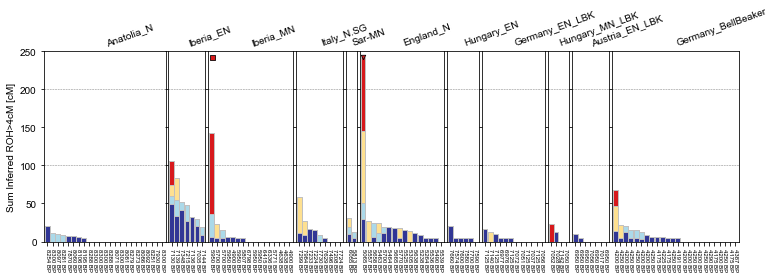

In [103]:
clsts = ["Anatolia_N", "Iberia_EN", "Iberia_MN", "Italy_N.SG", "Sar-MN", 
         "England_N", "Hungary_EN",
         "Germany_EN_LBK", "Hungary_MN_LBK", "Austria_EN_LBK", 
         "Germany_BellBeaker"] # "Czech_BellBeaker", "Lech_EBA" "Scotland_N"
df_plots, lgths = prep_dfs_plot_exact(df_t, pops=clsts, mod_only=False, exact=False)
x_labels = prep_xlabels(df_plots)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               ha_title="left", r_title=20, title_col="pop", hlines=[100, 200], 
               titles=clsts, x_labels=x_labels, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               savepath="./figures/manuscript/barplots/v2/farmer_pops.pdf")

# Plot the best Steppe has to offer

[10, 22, 12, 21, 14, 3, 7]
Saved figure to ./figures/manuscript/barplots/v2/pastoralist_pops.pdf


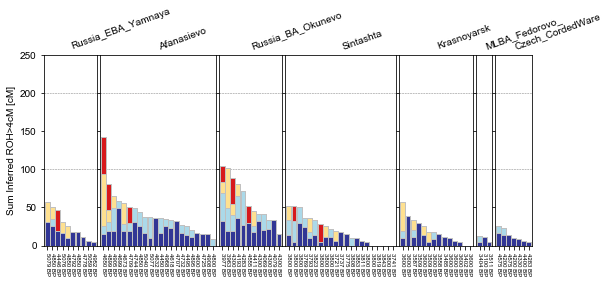

In [108]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_t= df1[df1["economy"]=="Pastoralist"]
clsts = ["Russia_EBA_Yamnaya", "Afanasievo", "Russia_BA_Okunevo", "Sintashta", 
         "Krasnoyarsk",  "MLBA_Fedorovo_", 
         "Czech_CordedWare"] # "Germany_CordedWare", "MLBA_Alakul"
df_plots, lgths = prep_dfs_plot_exact(df_t, pops=clsts, mod_only=False, exact=False)
x_labels = prep_xlabels(df_plots)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               titles=clsts, ha_title="left", r_title=20, title_col="pop", hlines=[100, 200], 
               x_labels=x_labels, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               savepath="./figures/manuscript/barplots/v2/pastoralist_pops.pdf")

# Plot island populations [Fig. 3]

In [4]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.1.csv", sep='\t')
df_plot = df1[(df1["region"]=="Islands") & (df1["age"]>0)]
df_plot["clst"].value_counts()

Iceland_Pre_Christian.SG        11
Russia_Bolshoy                   6
Greece_Minoan_Lassithi           4
Canary_Islands_Guanche.SG        3
Indian_GreatAndaman_100BP.SG     1
Russia_Chalmny_Varre             1
Bahamas_Taino.SG                 1
USA_AK_PaleoAleut.SG             1
Norway_N_HG.SG                   1
Greenland_Saqqaq.SG              1
Name: clst, dtype: int64

In [7]:
len(df_plot)

30

[1, 4, 1, 6, 3, 11, 1, 1, 1]
Saved figure to ./figures/manuscript/barplots/v5/islands.pdf


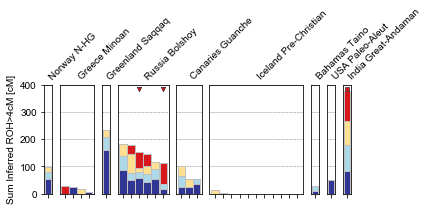

In [12]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.1.csv", sep='\t')
clsts = ["Norway_N_HG", "Greece_Minoan", "Greenland_Saqqaq", "Russia_Bolshoy",  
         "Canary_Islands_Guanche", "Iceland_Pre_Christian", 
         "Bahamas_Taino", "USA_AK_PaleoAleut", "Indian_GreatAndaman"] # Paleo_ALeut

labels = ["Norway N-HG", "Greece Minoan", "Greenland Saqqaq", "Russia Bolshoy",  
         "Canaries Guanche", "Iceland Pre-Christian", 
         "Bahamas Taino", "USA Paleo-Aleut", "India Great-Andaman"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=clsts, mod_only=False, exact=False)
x_labels = prep_xlabels(df_plots)
print(lgths)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/5, 2), ylim=[0,400], fs_x=6, wspace=0.3,
               titles=labels, ha_title="left", r_title=45, 
               title_col="pop", hlines=[100,200,300,400],
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 20], lw=0.5, sym_ofst=-15,
               savepath="./figures/manuscript/barplots/v5/islands.pdf")

## All islands basedon Island region

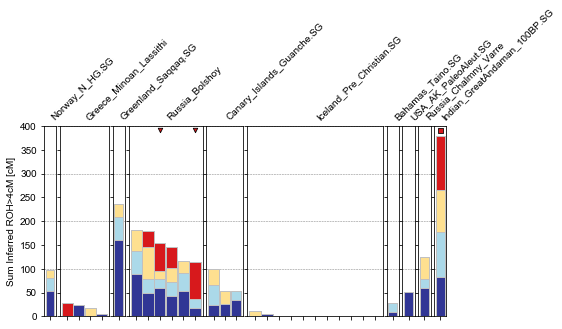

In [110]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_plot = df1[(df1["region"]=="Islands") & (df1["age"]>0)]
plot_dfs, cols = prepare_dfs_plot(df_plot, col_group="clst", mod_group="pop",
                                 split_modern=False)

plot_panel_row(plot_dfs, figsize=(len(df_plot)/4, 3.5), 
               ylim=[0,400], fs_x=6, wspace=0.1,
               titles=[], ha_title="left", r_title=45, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               savepath="")   # ./figures/manuscript/barplots/levant.png

## Plot Americas

In [126]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1.sort_values(by="sum_roh>4", ascending=False)

df_patagonia = df1[df1["region"].str.contains("Patagonia") & df1["age"]>0]
df_andean = df1[df1["region"].str.contains("Andea") & df1["age"]>0]
df_pw = df1[df1["region"].str.contains("Pacific") & (~df1["clst"].str.contains("SanNicolas")) & (df1["age"]>0)]
df_at = df1[df1["region"].str.contains("Atlantic Coast") & df1["age"]>0]
df_ber = df1[df1["region"].str.contains("Bering Sea") & df1["age"]>0]

df_plots = [df_ber, df_pw, df_andean, df_patagonia, df_at]
x_labels = prep_xlabels(df_plots)
labels = ["Bering Sea", "Pacific NW", "Andean", "Patagonia", "Atlantic Coast"]
lgths = [len(df) for df in df_plots]

Saved figure to ./figures/manuscript/barplots/v2/sa.pdf


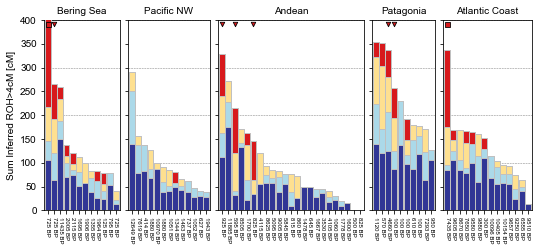

In [127]:
plot_panel_row(df_plots, figsize=(np.sum(lgths)/8, 3.5), ylim=[0,400], fs_x=6, wspace=0.1,
               titles=labels, ha_title="center", r_title=0, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=x_labels, leg_pos=0, degrees=[], 
               cutoffs=[50,100], ss=[25, 25], lw=0.8, sym_ofst=-8,
               Ns=[], savepath="./figures/manuscript/barplots/v2/sa.pdf")

# Do Pakistan Populations

In [16]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df2=df1[df1["clst"].str.contains("Pakistan")]
plot_dfs, cols = prepare_dfs_plot(df2, cms=[4, 8, 12, 20])

Saved figure to ./figures/manuscript/barplots/v3/pakistanv4.pdf


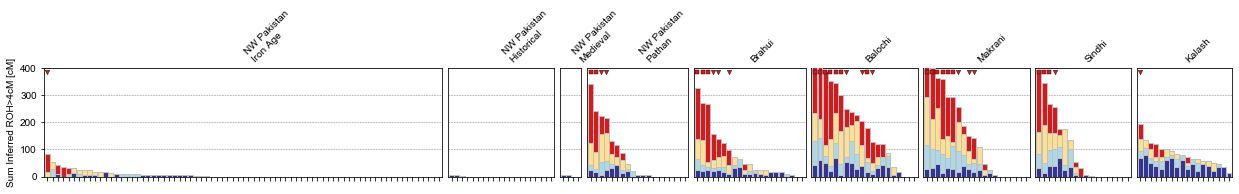

In [19]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
clsts = ["Pakistan_IA", "Pakistan_H",
         "Pakistan_Medieval", "Pathan", "Brahui", "Balochi", "Makrani", "Sindhi", "Kalash"]
labels = ["NW Pakistan \nIron Age", "NW Pakistan \nHistorical",
         "NW Pakistan \nMedieval", "NW Pakistan \nPathan", "Brahui", "Balochi", "Makrani", "Sindhi", "Kalash"]
df_plots, lgths = prep_dfs_plot_exact(df1, pops=clsts, mod_only=False, exact=False)

x_labels = prep_xlabels(df_plots)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 2), 
               ylim=[0,400], fs_x=6, wspace=0.05,
               titles=labels, ha_title="left", r_title=45, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 20], lw=0.4, sym_ofst=-15,
               savepath="./figures/manuscript/barplots/v3/pakistanv4.pdf")   # ./figures/manuscript/barplots/v2/pakistan.pd

# Do Levant [Figure 3]

In [2]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df2 = df1[df1["region"]=="Levante"]
#df2["pop"].value_counts()

Saved figure to ./figures/manuscript/barplots/v3/levant.pdf


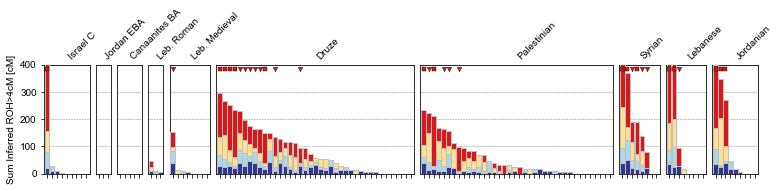

In [5]:
clsts = ["Israel_C", "Jordan_EBA", "Canaanite|Israel_MLBA", "Lebanon_Roman", "Lebanon_Medieval", "Druze", "Palestinian", "Syrian", "Lebanese", "Jordanian"]
labels = ["Israel C", "Jordan EBA", "Canaanites BA", "Leb. Roman", "Leb. Medieval", "Druze", "Palestinian", "Syrian", "Lebanese", "Jordanian"]
df_plots, lgths = prep_dfs_plot_exact(df1, pops=clsts, mod_only=False, exact=False)
x_labels = prep_xlabels(df_plots)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 2), 
               ylim=[0,400], fs_x=6, wspace=0.1,
               titles=labels, ha_title="left", r_title=45, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 20], lw=0.4, sym_ofst=-15,
               savepath="./figures/manuscript/barplots/v3/levant.pdf")   # ./figures/manuscript/barplots/levant.png

In [16]:
lgths

[9, 3, 5, 3, 8, 39, 38, 8, 8, 9]

In [8]:
dfc = pd.concat(df_plots)
df_anc = dfc[dfc["age"]>0]
df_mod = dfc[dfc["age"]==0]

In [13]:
idx = df_mod["sum_roh>20"]>50
print(f"Modern Indivdiuals close kin: {np.sum(idx)}/{len(idx)}")

idx = df_anc["sum_roh>20"]>50
print(f"Ancient Indivdiuals close kin: {np.sum(idx)}/{len(idx)}")

Modern Indivdiuals close kin: 30/102
Ancient Indivdiuals close kin: 2/28


In [ ]:
df_anc.sort_values(by="sum_roh>20", ascending=False)

### LEGACY PLOT

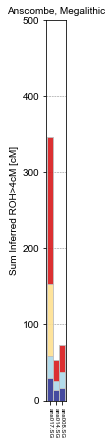

In [109]:
plot_panel_row(df_plots, figsize=(np.sum(lgths)/8, 7), ylim=[0,500], fs_x=6, wspace=0.1,
               titles=labels, ha_title="center", r_title=0, hspace_leg=0,
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=True, leg_pos=0, degrees=[], 
               Ns=[], savepath="")

# Do not assigned Sites

In [150]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_plot = df1[(df1["region"]=="all") & (df1["age"]>0)]
df_plots, lgths = prepare_dfs_plot(df_plot, col_group="clst", mod_group="pop")
lgths = [len(df) for df in df_plots]
x_labels = prep_xlabels(df_plots)

Saved figure to ./figures/manuscript/barplots/v2/not_assigned.pdf


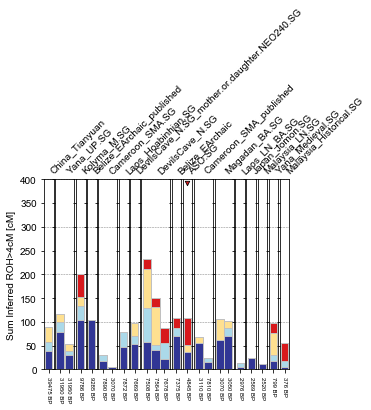

In [152]:
plot_panel_row(df_plots, figsize=(np.sum(lgths)/5, 3.5), 
               ylim=[0,400], fs_x=6, wspace=0.1,
               titles=[], ha_title="left", r_title=45, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=x_labels, leg_pos=0, degrees=[], Ns=[],
               cutoffs=[50,100], ss=[20, 25], lw=0.8, sym_ofst=-8,
               savepath="./figures/manuscript/barplots/v2/not_assigned.pdf")   # ./figures/manuscript/barplots/levant.png

### Combine barplots panel plots into one folder

In [135]:
dir_tozip = "./figures/manuscript/barplots/v2/"
dir_zip = "./figures/manuscript/barplots/barsv2.zip"
!zip -r -j $dir_zip $dir_tozip

updating: anc_cousins.png (deflated 9%)
updating: sa.pdf (deflated 21%)
updating: not_assigned.pdf (deflated 26%)
updating: cousin_pop.pdf (deflated 28%)
updating: levant.pdf (deflated 22%)
updating: pakistan.pdf (deflated 21%)
updating: islands.pdf (deflated 24%)
updating: farmer_pops.pdf (deflated 22%)
updating: hg_pops.pdf (deflated 22%)
updating: pastoralist_pops.pdf (deflated 23%)
updating: big_pop.pdf (deflated 27%)
updating: small_pops.pdf (deflated 23%)
  adding: anc_cousins.pdf (deflated 19%)


In [ ]:
df = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')
df["sum_roh_4-8"]=df["sum_roh>4"]-df["sum_roh>8"]
df.sort_values(by="sum_roh_4-8", ascending=False)[:50]#["sum_roh_4-8"][:50]

# Plot Close Kin Unions [Figure 3]

In [3]:
def prep_titles(df, df_anc, 
                col_string="pop1", col_title="pop2", col_search="pop"):
    """Prepare titles for close kin plots
    df: Close kin individuals (prepared)
    df_anc: All ancients
    titles: string of cluster labels"""
    titles = [df[col_string].values for df in plot_dfs]
    titles1 = [df[col_title].values for df in plot_dfs]
    titles_new = []
    for i in range(len(titles)):
        t, t1 = titles[i], titles1[i]
        idx = df_anc[col_search].str.contains(t[0])
        string_found = f"{len(t)}/{np.sum(idx)} {t1[0]}"
        titles_new.append(string_found)
    return titles_new

In [9]:
df = pd.read_csv("./Empirical/roh_all_inds_final_v42.1.csv", sep='\t')
df_anc = df[df["age"]>0]
df1 = df_anc[df_anc["sum_roh>20"]>50]
print(f"Loaded {len(df1)} Indiviudals with long ROH")
### If you want to modify the anno file
#df1["pop"].to_csv("./TablesOut/dumpster/pops_cousins.tsv", sep="\t", index=False)

df_anno = pd.read_csv("./TablesOut/dumpster/pops_cousins_anno.tsv", sep="\t")
islands = ["San-Nicolas", "Sweden Megalithic", "Andaman", "England", "Bolshoy", "Sardinia", "Tierra-del-Fuego", "Vanuatu", "Western-Archipelago"]

df2 = pd.merge(df1, df_anno, on="pop", how="left")
df2 = df2.drop_duplicates(subset="iid", keep="first")
assert(np.sum(df2["pop1"].isnull())==0) # Sanity Check if everything assigned

plot_dfs, cols = prepare_dfs_plot(df2, cms=[4, 8, 12, 20], col_group="pop1")

titles = prep_titles(df, df_anc, col_search="pop")
lgths = [len(df) for df in plot_dfs]

### Islands
bolds =  [any(x in t for x in islands) for t in titles]

### Do xlabels
xlabels = []
for df in plot_dfs:
    lbls = [str(int(x)) + " BP" for x in df["age"].values]
    xlabels.append(lbls)

Loaded 54 Indiviudals with long ROH


Saved figure to ./figures/manuscript/barplots/v5/anc_cousins.pdf


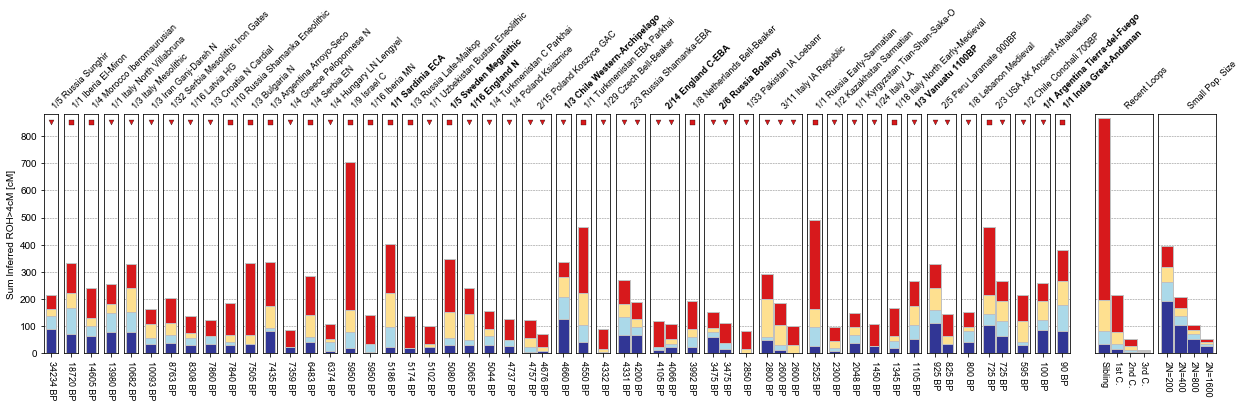

In [10]:
plot_panel_row(plot_dfs, figsize=(21, 8.8/4  * 2),  # np.sum(lgths)/4
               ylim=[0,880], fs_x=9, fs_t=9, wspace=0.3,
               ha_title="left", r_title=45, bolds=bolds,
               titles=titles, hlines=[100,200,300,400,500,600,700,800], 
               x_labels=xlabels, leg_pos=0, degrees=[0,1,2,3], 
               ticks_c=["Sibling", '1st C.', '2nd C.', '3rd C.'],
               Ns=[200, 400, 800, 1600],
               cutoffs=[50,100], ss=[25, 25], lw=0.3, sym_ofst=-30,
               savepath="./figures/manuscript/barplots/v5/anc_cousins.pdf") 

# Other Plots

## Devil's Cave [for manual inspection]

In [12]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["clst"].str.contains("Devil")]
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

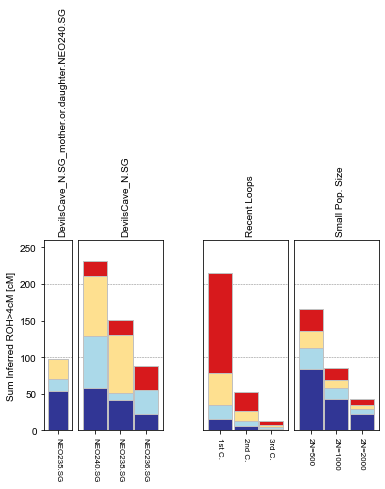

In [13]:
plot_panel_row(plot_dfs, figsize=(6, 3.5), 
               ylim=[0,260], fs_x=8, wspace=0.1,
               ha_title="left", r_title=90, 
               title_col="pop", hlines=[100,200,300,400,500,600], 
               x_labels=[], leg_pos=0, degrees=[1,2,3], Ns=[500, 1000, 2000],
               savepath="") 

# Plot Downsampling of Ust Ishim Replicates

Saved figure to ./figures/manuscript/supplement/downsampling_sa/us_ishim_bars.png


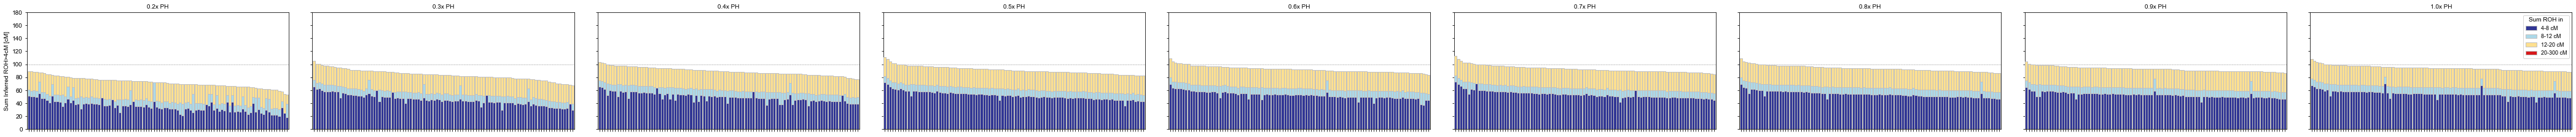

In [66]:
df = pd.read_csv("./Empirical/1240k/SA_Readcounts/Ust_Ishim_rep/combined_roh05.tsv", sep='\t')
df["pop"] = df["pop"].astype("str")
down_sampling_covs = np.linspace(0.2, 1.0, 9)
clsts = [f"{c:.1f}" for c in down_sampling_covs]
titles =[c + "x PH" for c in clsts]
df_plots, lgths = prep_dfs_plot_exact(df, pops=clsts, mod_only=False, exact=False)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/12, 3.5), 
               ylim=[0,180], fs_x=6, fs_l=9, wspace=0.1,
               titles=titles, ha_title="center", r_title=0, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=-1, degrees=[], Ns=[],
               savepath="./figures/manuscript/supplement/downsampling_sa/us_ishim_bars.png")   # ./figures/manuscript/barplots/pakistan.pdf

## Calculate Expectations under Model

In [8]:
def create_cousins_roh(degrees=[1,2,3], 
                       bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for Cousins of degree degrees [list]
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    c_roh = np.zeros((len(degrees),len(bins))) # Container for results Cousins
    for i,c in enumerate(degrees):
        for j,b in enumerate(bins):
            m = c*2 + 4
            c_roh[i,j] = e_roh.exp_roh_len_in_bin_rel(l=b, m=m, comm_anc=4, bins=10000)
    return c_roh

def create_Ne_roh(Ns=[400, 800, 1600, 3200, 6400], 
                  bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for panmictic population sizes
    Ns: List of population sizes
    bins: Length Bins (in Morgan) to calculate expectations from
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    n_roh = np.zeros((len(Ns),len(bins))) # Container for results Cousins
    for i,N in enumerate(Ns):
        for j,b in enumerate(bins):
            n_roh[i,j] = e_roh.exp_roh_len_in_bin_N(b, N=N, bins=bin_n)
    return n_roh

In [28]:
%%time
#bins = [[0.04, 0.08], [0.08, 0.12], [0.12, 0.2], [0.2,3.0],[0,3.0]] # 4 bis
bins = [[0.04,0.08]]
c=["#313695", "#abd9e9", "#fee090", "#d7191c"] # Colors for 4 bins
Ns=[1000, 2000, 6000,50000]
degrees=[1, 2, 3, 4]

### Calcualte Expectations Cousins:
c_roh = create_cousins_roh(degrees = degrees, bins = bins)

### Calculate Expectations Ne:
n_roh = create_Ne_roh(Ns=Ns, bins = bins) # Legacy so that code below works
#std_roh = std_Ne_roh(Ns=Ns, bins = bins)

print(c_roh *100)
print(n_roh * 100)
#print(std_roh)
#print(std_roh**2)

[[15.41710698]
 [ 5.79345015]
 [ 1.9474925 ]
 [ 0.6090802 ]]
[[43.03085689]
 [21.81427718]
 [ 7.33890854]
 [ 0.88426525]]
CPU times: user 163 ms, sys: 16.2 ms, total: 179 ms
Wall time: 175 ms


In [15]:
e_roh = Expected_Roh()
e_roh.exp_roh_len_in_bin_rel(l=[0.0,3.5], m=4, comm_anc=4, bins=10000)

8.802156305686358

In [16]:
e_roh = Expected_Roh()
e_roh.exp_roh_len_in_bin_rel(l=[0.0,3.5], m=3, comm_anc=2, bins=10000)

8.71996812281786

In [21]:
chr_lgts = np.array([2.8426, 2.688187, 2.232549, 2.14201, 2.040477, 1.917145, 1.871491, 1.680018, 
                1.661367, 1.8090949, 1.5821669, 1.745901, 1.2551429, 1.1859521, 1.413411, 
                1.340264, 1.2849959, 1.175495, 1.0772971, 1.082123, 0.636394, 0.724438])

In [20]:
np.sum(chr_lgts)/4

8.847129950000001

In [25]:
np.sum(np.exp(-chr_lgts * 3) * chr_lgts * 1/4)

0.1271703288315191

In [26]:
e_roh.exp_roh_len_in_bin_rel(l=[0.0,3.5], m=3, comm_anc=2, bins=10000) + np.sum(np.exp(-chr_lgts * 3) * chr_lgts * 1/4)

8.84713845164938

# Plot missing coordinates

In [41]:
#df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = pd.read_csv("./Data/ReichLabEigenstrat/Raw/meta.v42.csv", sep=",")
df_bad = df1[df1["lat"].isnull()]
df_counts = pd.DataFrame(df_bad["study"].value_counts())

In [29]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')

In [ ]:
df1[df1["clst"].str.contains("Aleut")]

# Legacy

In [3]:
def plot_bar_ax(ax, fracs, bins=[], c=["#313695", "#abd9e9", "#fee090", "#d7191c"], x_ticks = [], 
                ec = "silver", fs_l=10, fs = 10, fs_x=8, barWidth=0.95, ylim = [0,220], stds = [], title="", 
                yticks=False, legend=False, r_title=0, hlines=[], ylabel="Sum Inferred ROH>4cM [cM]"):
    """Plot bars of ROH on Axis.
    ax: Where to Plot on
    fracs: Fractions of Expected ROH: [n Inds, n Bins]
    c: Which colors to plot
    bins: List of Bins (needed for legend - plotted if len()>0)
    yticks: Whether to plot Y tick Labels
    legend: Whether to plot Legend
    fs_x: Fontsize on the x Labels
    r_title: Rotation of the title
    hlines: List where to plot hlines"""
    y = fracs ### Fractions (along 1st axis length classes)
    x = np.arange(len(y))

    for i in range(len(y[0,:])): # From last to first (For Legend)
        b = np.sum(y[:,:i], axis=1)
        ax.bar(x, y[:,i], bottom=b, color=c[i], edgecolor=ec, width=barWidth, label=f"{bins[i,0]}-{bins[i,1]} cM", alpha=0.9)
        if len(stds)>0 and i>0: # Plot some standard deviations.
            ax1.errorbar(r, b, yerr=stds[:,i], fmt='none', linewidth=2, color="k")
    
    if len(hlines)>0:
        for y in hlines:
            ax.axhline(y=y, zorder=0, linestyle="--", color="gray", lw=0.5)     
    
    if legend:
        ax.legend(fontsize=fs_l, loc="upper right", title="Sum ROH in")
    ax.set_ylabel(ylabel, fontsize=fs)
    ax.set_ylim(ylim)
    ax.set_xlim(x[0] - 0.7*barWidth, x[-1] + 0.7*barWidth)
    if len(x_ticks)>0:
        ax.set_xticks(x)
        ax.set_xticklabels(x_ticks, fontsize=fs_x, rotation=270)
    else:
        ax.set_xticks([])
    if not yticks:
        ax.set_yticklabels([])
        ax.set_ylabel("")
    if len(title)>0:
        ax.set_title(title, fontsize=fs, rotation=r_title)
        
        
def plot_panel_row(plot_dfs, wspace=0.05, hspace=0.01, figsize=(24,3.5), savepath="", x_ticks=True,
                   c=["#313695", "#abd9e9", "#fee090", "#d7191c"], ylim = [0,250], r_title = 90, 
                   leg_pos = -2, show=True, title_col="clst", legends=True, hlines=[],
                   bins = [[0.04, 0.08], [0.08, 0.12], [0.12, 0.2], [0.2, 3.0]],
                   degrees=[1, 2, 3], Ns=[400, 800, 1600, 3200, 6400]):
    """Plot row of ROH bin plots from plot_dfs (each df one panel)
    leg_pos = Where to plot legend (if outside range no legend plot)
    r_title: How much to rotate the title
    gs: Gridspec: If given plot on there.
    legends: Whether to plot the two legends
    hlines: Where to plot horizontal lines
    bins: list of length bins to plot [[a1,a2],...[z1,z2]]
    Ns: What population sizes to plot in barplot [list]
    degrees: What degrees of Cousins to plot. [list]"""
    bins_cM=(np.array(bins)*100).astype("int")
    n_plots = len(plot_dfs)
    width_ratios = [len(df) for df in plot_dfs]
    if legends:     
        n_plots+= 2
        width_ratios+=[len(degrees), len(Ns)]
        
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, n_plots, width_ratios=width_ratios, figure=fig)
    
    gs.update(wspace=wspace, hspace=hspace) # set the spacing between axes

    for i,df in enumerate(plot_dfs):   
        if i==0:
            ytick=True
        else:
            ytick=False

        if i == (len(plot_dfs) + leg_pos):
            legend=True
        else:
            legend=False

        ax = plt.subplot(gs[i])    # Extract the Sub Plot to Plot onto
        obs_roh = df[cols].values
        
        ### Calculate the value in the Bins
        for i in range(len(cols)-1):
            obs_roh[:,i] = obs_roh[:,i] - obs_roh[:,i+1]
        
        if x_ticks:
            x_ticks0 = df["iid"].values
        else: 
            x_ticks0 = []
        plot_bar_ax(ax, obs_roh, bins_cM, yticks=ytick, legend=legend, r_title=r_title, c=c,
                    x_ticks = x_ticks0, title=df[title_col].values[0], ylim=ylim, hlines=hlines)

    #### Plot the legend bars
    if legends:
        ### 0) Calculate Expectations
        c_roh = create_cousins_roh(degrees = degrees, bins = bins)
        sum_roh = create_Ne_roh(Ns=Ns, bins = bins)
        
        ### 1) Small Pops
        ax = plt.subplot(gs[-2])    # The left subplot (Timeline)
        plot_bar_ax(ax, c_roh*100, bins_cM, yticks=False, legend=False, ylim=ylim, c=c, hlines=hlines,
                   x_ticks = ["1st C.", "2nd C.", "3rd C."], title="Recent Loops", r_title=r_title)
        ### 2) Cousins
        ax = plt.subplot(gs[-1])
        ticks_N = [f"2N={i}" for i in Ns]
        plot_bar_ax(ax, sum_roh*100, bins_cM, yticks=False, legend=False, ylim=ylim, c=c,
                    hlines=hlines, x_ticks = ticks_N, title="Small Pop. Size", r_title=r_title)

    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
        print(f"Saved figure to {savepath}")
        
    if show:
        plt.show()
    return
    
    
def plot_legend_only(figsize=(7,6), wspace=0.05, hspace=0.01, savepath="",
                     fs=12, fs_l=10, fs_x=10, c=["#313695", "#abd9e9", "#fee090", "#d7191c"],
                     bins = [[0.04, 0.08], [0.08, 0.12], [0.12, 0.2], [0.2,3.0]],
                     degrees=[1, 2, 3], Ns=[400, 800, 1600, 3200, 6400],
                     ylim=[0,250]
                     ):
    """Plot Inbreeding from recent Cousins as well as small pop size.
    bins: list of length bins to plot [[a1,a2],...[z1,z2]]
    Ns: What population sizes to plot in barplot [list]
    degrees: What degrees of Cousins to plot. [list]"""
    width_ratios = [len(degrees), len(Ns)]
    bins_cM=(np.array(bins)*100).astype("int")
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 2, width_ratios=width_ratios, figure=fig)
    ax_cousin = plt.subplot(gs[0])    # The left subplot (Timeline)
    ax_Ne = plt.subplot(gs[1])
    gs.update(wspace=wspace, hspace=hspace) # set the spacing between axes

    ### Calcualte Expectations Cousins:
    c_roh = create_cousins_roh(degrees = degrees, bins = bins)
    
    ### Calculate Expectations Ne:
    sum_roh = create_Ne_roh(Ns=Ns, bins = bins)
    
    plot_bar_ax(ax_cousin, c_roh*100, bins_cM, yticks=True, legend=False, 
                fs=fs, fs_l=fs_l, fs_x=fs_x, c=c, ylabel="Expected Sum ROH>4cM [cM]",
                x_ticks = ["1st C.", "2nd C.", "3rd C."], title="Recent Loops",
                 ylim=ylim)

    ticks_N = [f"2N={i}" for i in Ns]
    plot_bar_ax(ax_Ne, sum_roh*100, bins_cM, yticks=False, legend=True, c=c, 
                fs=fs, fs_l=fs_l, fs_x=fs_x, x_ticks = ticks_N, 
                title="Small Pop. Size", ylim=ylim)
            
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
        print(f"Saved figure to {savepath}") 
    plt.show()
    
    
def prepare_dfs_plot(df, cms=[4,8,12], col_group="clst", split_modern=True,
                     mod_group="pop", sortcol=0):
    """Prepare the Dataframe which to plot
    Return split up (and sorted) list of df, return list of column names
    df: Master Dataframe
    cms: Minimum Length of Chromosomes in bins
    sortcol: By which > column to sort within group [int]
    if split_modern, split age==0 samples by mod_group
    """
    
    if split_modern:
        mod_idx = df["age"]==0  # Pull out modern idx
        df.loc[mod_idx, col_group]=df.loc[mod_idx, mod_group]
        
    plot_dfs = [dft for _, dft in df.groupby(col_group)]
    ### Sort by age
    idx = np.argsort([-df["age"].values[0] for df in plot_dfs])
    plot_dfs = [plot_dfs[i] for i in idx] ## Sort
    
    ### Split up blocks and sort by lowest
    cols = [f"sum_roh>{cm}" for cm in cms]
    for df in plot_dfs:
        df.sort_values(by=cols[sortcol], inplace=True, ascending=False)
    return plot_dfs, cols

In [3]:
def create_cousins_roh(degrees=[1,2,3], 
                       bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for Cousins of degree degrees [list]
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    c_roh = np.zeros((len(degrees),len(bins))) # Container for results Cousins
    for i,c in enumerate(degrees):
        for j,b in enumerate(bins):
            m = c*2 + 4
            c_roh[i,j] = e_roh.exp_roh_len_in_bin_rel(l=b, m=m, comm_anc=4, bins=10000)
    return c_roh

#bins = [[0.04,0.08],[0.08,0.12],[0.12,3.00]]  # The bins I want to plot (eventually maybe do 12,16 as welll)
#cousins = [1, 2, 3]  # Which Cousins to Plot

def create_Ne_roh(Ns=[400, 800, 1600, 3200, 6400], 
                  bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for panmictic population sizes
    Ns: List of population sizes
    bins: Length Bins (in Morgan) to calculate expectations from
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    n_roh = np.zeros((len(Ns),len(bins))) # Container for results Cousins
    for i,N in enumerate(Ns):
        for j,b in enumerate(bins):
            n_roh[i,j] = e_roh.exp_roh_len_in_bin_N(b, N=N, bins=bin_n)
    return n_roh

def std_Ne_roh(Ns=[400, 800, 1600, 3200, 6400], 
                  bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for panmictic population sizes
    Ns: List of population sizes
    bins: Length Bins (in Morgan) to calculate expectations from
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    var_roh = np.zeros((len(Ns),len(bins))) # Container for results Cousins
    for i,N in enumerate(Ns):
        for j,b in enumerate(bins):
            var_roh[i,j] = e_roh.var_roh_len_in_bin_N(b, N=N, bins=bin_n)
    return np.sqrt(var_roh)  # Return Standard Deviation

In [6]:
def plot_panel_2d(plot_dfs, gs=0):
    """Plot 2D Panel of Bar Plots for ROH"""
    raise NotImplementedError("pls do this")

def prep_gridspecs_2d(dim_list, fig, height_ratios=[]):
    """Prepare Gridspec objects.
    Return list of list of axis to plot on. 
    dim_list: List of Dimensions [integer list] for each row)
    fig: Figure Object on where to do it
    height_ratios: Ratios of the Heights of rows"""
    if len(height_ratios)==0:
        height_ratios = [1 for _ in dim_list]
        
    gs = gridspec.GridSpec(len(dim_list), 1, height_ratios=height_ratios, figure=fig)
    
    ax_list = []
    for i,d in enumerate(dim_list):
        gss = gs[i].subgridspec(1, len(d), width_ratios=d)   # Do the width_ratios here!!
        ax_list0 = [plt.subplot(g) for g in gss] # Create Axis Objects
        ax_list.append(ax_list0)
    return ax_list, gs

def plot_panel_roh_bars(plot_dfs, figsize=(24,6), wspace=2.0, hspace=2.0, 
                        ylim=[0,600], r_title=90, leg_pos=-1, bins = [[0.04,0.08], [0.08,0.12], [0.12,3.00]]):
    """Plot a panel of ROH Bars.
    plot_all_dfs: List of dfs to plot"""
    fig = plt.figure(figsize=figsize)
    bins_cM=(np.array(bins)*100).astype("int")
    
    dim_list = [list(map(len,ls)) for ls in plot_dfs]
    ax_list, gs = prep_gridspecs_2d(dim_list, fig)

    gs.update(wspace=wspace, hspace=hspace) # set the spacing between axes

    for j, df_row in enumerate(plot_dfs): 
        for i, df in enumerate(df_row):   
            if i==0:
                ytick=True
            else:
                ytick=False

            if i == (len(df_row) + leg_pos):
                legend=True
            else:
                legend=False

            ax = ax_list[j][i]
            obs_roh = df[cols].values
            obs_roh[:,0] = obs_roh[:,0] - obs_roh[:,1]
            obs_roh[:,1] = obs_roh[:,1] - obs_roh[:,2]
            obs_roh[:,2] = obs_roh[:,2]

            plot_bar_ax(ax, obs_roh, bins_cM, yticks=ytick, legend=legend, r_title=r_title,
                        x_ticks = df["iid"].values, title=df["clst"].values[0], ylim=ylim)
    plt.show()

# Area 51

3731
Saved figure to ./figures_test/islands_roh.pdf


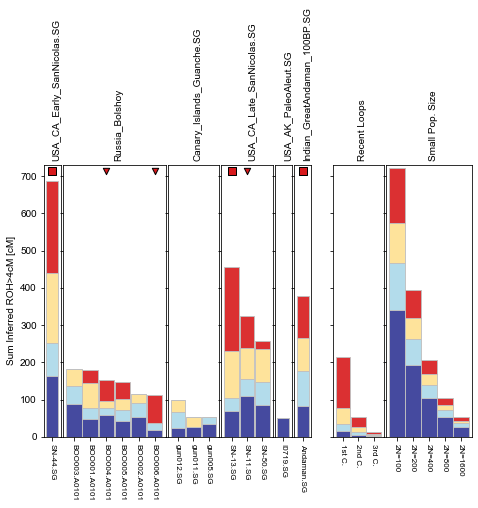

In [4]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
print(len(df1))
#df1 = df1[df1["study"].str.contains("MittnikNatureCommunications2018")]
#df1 = df1[df1["study"].str.contains("Lamnidis")]
df1 = df1[df1["pop"].str.contains("Nicolas|Bolshoy|Guanche|GreatAndaman|PaleoAleut")]
#df1["clst"]=df1["pop"]

plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

plot_panel_row(plot_dfs1, savepath="./figures_test/islands_roh.pdf", leg_pos=0, ylim=[0, 730], 
               figsize=((len(df1)+8)/3, 5), 
               Ns=[100, 200, 400, 800, 1600],
               cutoffs=[50,100], ss=[40, 50], sym_ofst=-15,
              )

In [2]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_anc = df1[df1["age"]>0]

In [10]:
df_anc.sort_values(by="sum_roh>20", ascending=False)[:59][["pop", "sum_roh>20", "age", "study", "lat", "lon"]]

,pop,sum_roh>20,age,study,lat,lon
1049,Israel_C,545.019401,5950.0,HarneyMayNatureCommunications2018,32.974167,35.331389
3710,Russia_EarlySarmatian_SouthernUrals.SG,324.866605,2525.0,JarveCurrentBiology2019,53.088589,58.660441
694,Bulgaria_N,267.044592,7505.0,MathiesonNature2018,43.160890,25.883410
194,USA_AK_Ancient_Athabaskan_1100BP_father.or.son...,248.605501,725.0,FlegontovNature2019,62.951189,-155.594724
101,USA_CA_Early_SanNicolas.SG,247.849303,5337.0,ScheibScience2018,33.264278,-119.539000
423,Turkmenistan_EBA_Parkhai,243.147800,4550.0,NarasimhanPattersonScience2019,38.348048,56.245430
3506,USA_CA_Late_SanNicolas.SG,226.224903,811.0,ScheibScience2018,33.264278,-119.539000
103,Sweden_Megalithic.SG,192.539305,5080.0,SanchezQuintoPNAS2019,57.338491,18.256295
380,Sar-ECA,179.343330,5186.5,Marcus et al. 2018,39.163200,8.532600
3614,Argentina_ArroyoSeco2_7700BP,162.067808,7435.0,PosthNakatsukaCell2018,-38.360556,-60.244167


In [49]:
df_anc[df_anc["study"].str.contains("Scheib")]

,iid,pop,max_roh,sum_roh>4,n_roh>4,sum_roh>8,n_roh>8,sum_roh>12,n_roh>12,sum_roh>20,...,lon,age,study,clst,mean_cov,n_cov_snp,include_alt,region,color,economy
101,SN-44.SG,USA_CA_Early_SanNicolas.SG,65.982402,688.231434,58,525.930033,29,436.336621,20,247.849303,...,-119.539000,5337.0,ScheibScience2018,USA_CA_Early_SanNicolas.SG,3.097140,1111229,1,Pacific NW,purple,Foraging
104,SC-05.SG,LSCI.SG,17.445801,84.528593,11,43.249599,3,32.772301,2,0.000000,...,-118.500000,1051.0,ScheibScience2018,LSCI.SG,4.302848,1107916,1,Pacific NW,purple,Foraging
122,CT-01.SG,LSCI.SG,10.901904,137.534199,21,55.425199,6,0.000000,0,0.000000,...,-118.416667,414.0,ScheibScience2018,LSCI.SG,2.806377,1085390,1,Pacific NW,purple,Foraging
126,CR-01.SG,Island_Chumash_SanCruz.SG,9.900099,46.861388,7,19.688401,2,0.000000,0,0.000000,...,-119.726389,1052.0,ScheibScience2018,Island_Chumash_SanCruz.SG,2.953424,1079438,1,Pacific NW,purple,Foraging
236,SN-11.SG,USA_CA_Late_SanNicolas.SG,36.820000,325.577445,33,216.507680,13,169.222088,8,87.133599,...,-119.539000,1100.0,ScheibScience2018,USA_CA_Late_SanNicolas.SG,1.850441,975879,1,Pacific NW,purple,Foraging
248,SM-02.SG,Island_Chumash_SanMiguel.SG,11.724996,61.152985,9,22.524594,2,0.000000,0,0.000000,...,-120.383333,737.0,ScheibScience2018,Island_Chumash_SanMiguel.SG,1.930500,963392,1,Pacific NW,purple,Foraging
574,CK-13.SG,ASO.SG,32.427806,107.097565,9,70.360388,3,70.360388,3,54.872388,...,-83.066667,4845.0,ScheibScience2018,ASO.SG,1.293308,826092,1,all,gray,Low Certainty
788,PS-06.SG,Mainland_Chumash.SG,14.132601,66.165999,10,23.881894,2,14.132601,1,0.000000,...,-120.648056,1463.0,ScheibScience2018,Mainland_Chumash.SG,1.106272,783702,1,Pacific NW,purple,Foraging
1400,523a.SG,Alaskan_Athabskan.SG,24.474197,79.077291,9,55.390995,4,38.583296,2,24.474197,...,-150.190000,125.0,ScheibScience2018,Alaskan_Athabskan.SG,0.776288,584475,1,Bering Sea,purple,Foraging
3506,SN-13.SG,USA_CA_Late_SanNicolas.SG,59.737399,455.327516,32,387.192213,19,351.594299,15,226.224903,...,-119.539000,811.0,ScheibScience2018,USA_CA_Late_SanNicolas.SG,0.580568,509837,1,Pacific NW,purple,Foraging


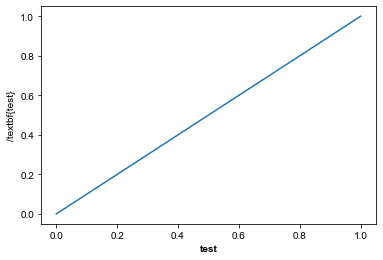

In [4]:
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

plt.figure()
plt.plot([0,1],[0,1])
ax = plt.gca()
ax.set_xlabel("test", weight=1000)
ax.set_ylabel('/textbf{test}')
plt.show()